In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, timedelta

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
one_year = calc_temps('2011-02-28', '2012-02-28')
print(one_year[0])

(56.0, 72.76152158010241, 86.0)


30.0


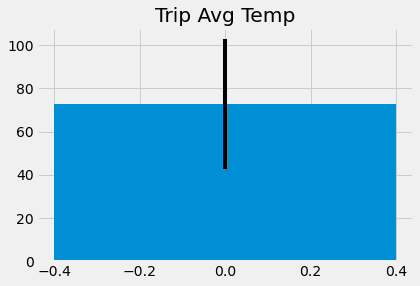

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
year_avg = one_year[0][1]
year_max = one_year[0][2]
year_min = one_year[0][0]
error = (year_max - year_min)
print(error)
ax.bar(range(1), year_avg, yerr=error, align='center')
# ax.set_xticks([""])
ax.set_title('Trip Avg Temp')
plt.show()



### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.date, Measurement.station, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation]
precip_stations = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date == "2016-08-01").order_by(Measurement.prcp.desc())

for i in precip_stations:
    (Measurement.date, Measurement.station, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation) = i
    pdate = Measurement.date
    st_code = Measurement.station
    st_name = Station.name
    precip = Measurement.prcp
    lat = Station.latitude
    lon = Station.longitude
    elv = Station.elevation
    print(f'Record: \n Date: {pdate}, \nStation Code:  {st_code}, \nStation Name:  {st_name}, \nPrecipitation:  {precip} inches, \nLatitude:  {lat}, \nLongitude:  {lon}, \nElevation:  {elv} feet\n\n')



Record: 
 Date: 2016-08-01, 
Station Code:  USC00519281, 
Station Name:  WAIHEE 837.5, HI US, 
Precipitation:  3.53 inches, 
Latitude:  21.45167, 
Longitude:  -157.84888999999998, 
Elevation:  32.9 feet


Record: 
 Date: 2016-08-01, 
Station Code:  USC00513117, 
Station Name:  KANEOHE 838.1, HI US, 
Precipitation:  2.35 inches, 
Latitude:  21.4234, 
Longitude:  -157.8015, 
Elevation:  14.6 feet


Record: 
 Date: 2016-08-01, 
Station Code:  USC00516128, 
Station Name:  MANOA LYON ARBO 785.2, HI US, 
Precipitation:  2.21 inches, 
Latitude:  21.3331, 
Longitude:  -157.8025, 
Elevation:  152.4 feet


Record: 
 Date: 2016-08-01, 
Station Code:  USC00519523, 
Station Name:  WAIMANALO EXPERIMENTAL FARM, HI US, 
Precipitation:  0.54 inches, 
Latitude:  21.33556, 
Longitude:  -157.71139, 
Elevation:  19.5 feet


Record: 
 Date: 2016-08-01, 
Station Code:  USC00519397, 
Station Name:  WAIKIKI 717.2, HI US, 
Precipitation:  0.08 inches, 
Latitude:  21.2716, 
Longitude:  -157.8168, 
Elevation:  3.

In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(None, None, None)]

In [47]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

start_date = dt.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:])) 
end_date = dt.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:]))
delta = end_date - start_date

date_list = []
for i in range(delta.days+1):
    day = start_date + timedelta(days=i)
    date_list.append(day)

normals = []
for j in date_list:
    normals.append(daily_normals(day))

print(normals)

# Use the start and end date to create a range of dates

 # filter(Measurement.date >= start_date).\
    # filter(Measurement.date <= end_date).\
# dates = []
# for onedate in datestrings:
#     convert = datetime.strptime(onedate[0], "%m-%d").date()
#     dates.append(convert)

# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
# normals = []

[[(None, None, None)], [(None, None, None)], [(None, None, None)], [(None, None, None)], [(None, None, None)], [(None, None, None)], [(None, None, None)]]


In [27]:
datestrings

[(2007)]

In [19]:
print(datestrings)

[]


In [15]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [16]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [17]:
session.close()